In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
traindf =pd.read_csv ("Loan_train_data.csv")
testdf = pd.read_csv("Loan_test_data.csv")

In [3]:
print(traindf.shape)
print("Missing Values", traindf.isnull().sum().sum())
print(traindf.columns)

(614, 13)
Missing Values 149
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
print(testdf.shape)
print("Missing Values", testdf.isnull().sum().sum())
print(testdf.columns)

(367, 12)
Missing Values 84
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [5]:
# As we can check in test data, we don't have 'Loan Status', well that is our dependant varible so leave that
#Need to do concation all and then could fill missing value simultanously
# It will add the data on the bases of rows indexing
df = pd.concat([traindf,testdf], axis = 0) 
df.shape


(981, 13)

In [6]:
# now let's see the final dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [9]:
# let's re-index the row otherwwise merging will have issues
#if we will not do inplace, then dataset will not get changed
# if we will not drop, then we will have two index section
df.reset_index(inplace = True, drop = True)

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
# Let's check the missing values
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
# Total rows and columns
df.shape

(981, 13)

In [13]:
# Let's see the count of Gender
print(df['Gender'].value_counts())
print(df['Gender'].unique())
print(Counter(df['Gender']))

Male      775
Female    182
Name: Gender, dtype: int64
['Male' 'Female' nan]
Counter({'Male': 775, 'Female': 182, nan: 24})


In [14]:
# As we saw more than 80% is male, so will replace all null value with male
print(df[df['Gender'].isnull()].index.tolist())
# These rows are having nul value
# lEt's fill
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
print(df['Gender'].isnull().sum())
print(Counter(df['Gender']))

[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592, 636, 665, 720, 752, 823, 845, 859, 893, 910, 917, 932]
0
Counter({'Male': 799, 'Female': 182})


In [15]:
# Now let's takes all the Object class null value into list
cols = ['Married','Dependents','Self_Employed']
# Let's fill all the object null value at same moement
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [16]:
print(Counter(df['Married']))
print(Counter(df['Dependents']))
print(Counter(df['Self_Employed']))

Counter({'Yes': 634, 'No': 347})
Counter({'0': 570, '1': 160, '2': 160, '3+': 91})
Counter({'No': 862, 'Yes': 119})


In [17]:
print(df['LoanAmount'].isnull().sum())

27


In [18]:
# Now will fill mean value value in the LoanAmount and loan amount term
# But we have to filter the loanmaount with loan term, which were taken what amount of term loan
pd.crosstab(df['LoanAmount'].isnull(), df['Loan_Amount_Term'])


Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [19]:
df.groupby(df['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [20]:
# Let's fill the missing values in LoanAmount
# with the mean of the respective loanTerm
# As we can 360 has high i.e 144, will fill 350 with 144 in missing area
# rest 180 and 240 has alsmost approx to 130.

df['LoanAmount'][(df['LoanAmount'].isnull()) & (df['Loan_Amount_Term']==360)]=144


In [21]:
df['LoanAmount'][(df['LoanAmount'].isnull())] =130

In [22]:
df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [23]:
# Let's see the stage of missing value
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [24]:
# Let's fill the loanAmountTerm, firstly need to check which would best
print(df['Loan_Amount_Term'].mean())
print(df['Loan_Amount_Term'].median())

342.2018730489074
360.0


In [25]:
pd.crosstab(df['Loan_Amount_Term'].isnull().sum(), df['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
row_0,,,,,,,,,,,,
20,1,2,3,3,7,4,66,8,20,1,823,23


In [26]:
#i will fill with median value
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [27]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [28]:
# Let's check the credit_history
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [60]:
# As we can see the value ratio is 80:20, so best would to median value
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [62]:
df['Credit_History'].isnull().sum()

0

Well not as we match with every independant section, we have not gotten any clear remakation ratio to fill with that value. So to fill such kind of data, we will do Logistic Regression to fill the **Credit_History**.
While assuming "Credit_History" as a depandant variable, we will fill all missing value, then again will move ahead for the next "SVM" module

But Before moving further, firsly we will do " One-Hot encoding" Means will create the dummu variable for all columns and drop the first columns

In [63]:
df1 = pd.get_dummies(df.drop(['Loan_ID'], axis = 1), drop_first = True)

In [64]:
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          981 non-null    int64  
 1   CoapplicantIncome        981 non-null    float64
 2   LoanAmount               981 non-null    float64
 3   Loan_Amount_Term         981 non-null    float64
 4   Credit_History           981 non-null    float64
 5   Gender_Male              981 non-null    uint8  
 6   Married_Yes              981 non-null    uint8  
 7   Dependents_1             981 non-null    uint8  
 8   Dependents_2             981 non-null    uint8  
 9   Dependents_3+            981 non-null    uint8  
 10  Education_Not Graduate   981 non-null    uint8  
 11  Self_Employed_Yes        981 non-null    uint8  
 12  Property_Area_Semiurban  981 non-null    uint8  
 13  Property_Area_Urban      981 non-null    uint8  
 14  Loan_Status_Y            9

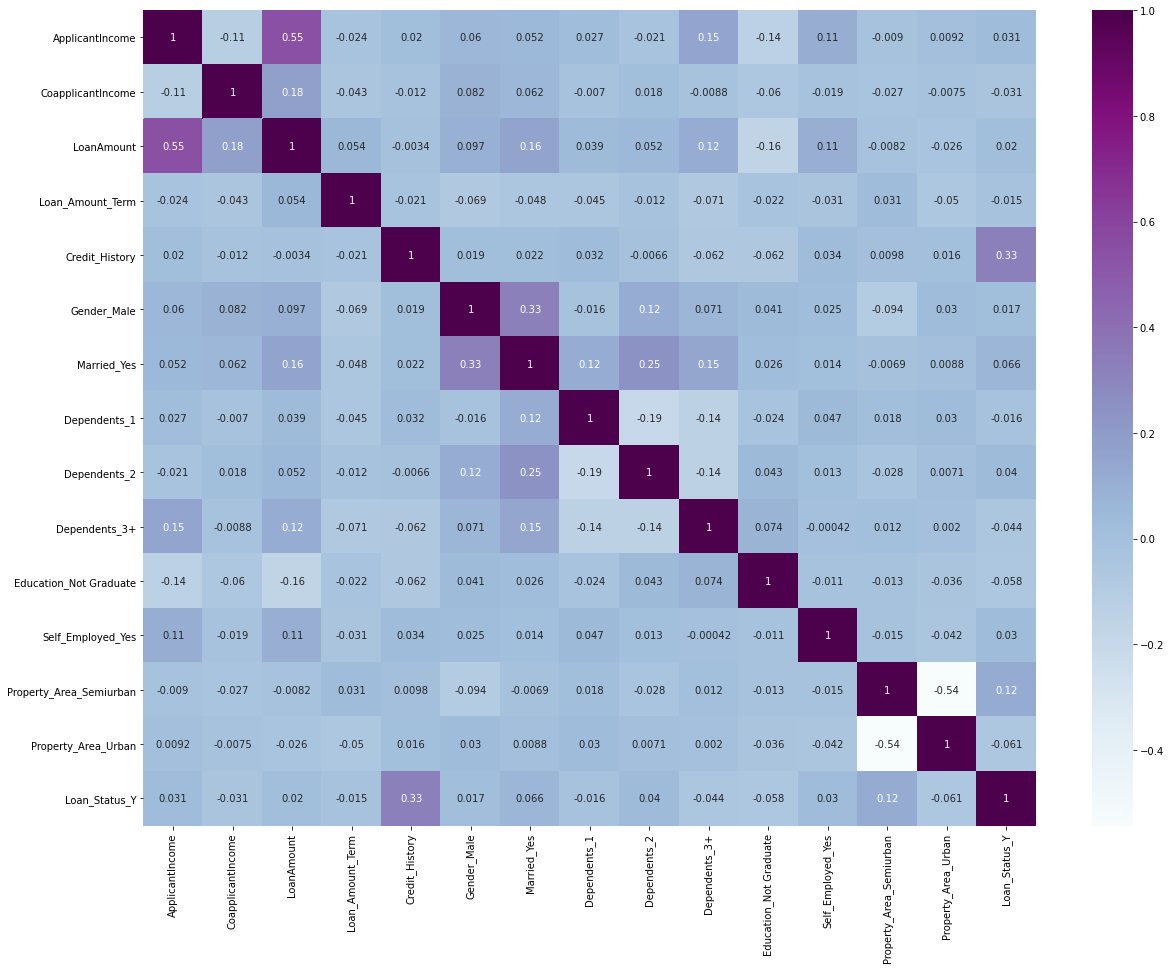

In [72]:
# Firstly let's check the corr relation
import seaborn as sns
corr = df1.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot= True, cmap='BuPu')


In [74]:
# let merge the ApplicantIncome and Co-applicant Income in new variable " Total Income"
df1['Total_Income'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Total_Income
0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,5849.0
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,6091.0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1,3000.0


## Log Tranformation
Log transformation is a data transformation method in which it replaces each variable x with a log(x). 

(like income where most people are poor but there are a few millionaires) and you don't want them to be too influential, taking the log brings all the values closer)

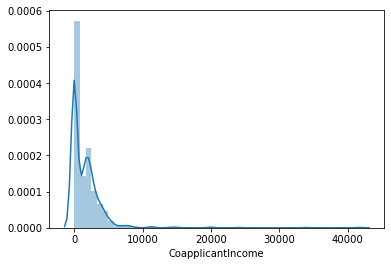

In [80]:
# Now let's drop Unnecessory columns, which has already been created as dummy variable
sns.distplot(df1['CoapplicantIncome'])

ValueError: cannot convert float NaN to integer

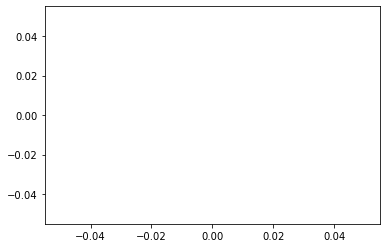

In [81]:
# after doing the log transformation
df1['CoapplicantIncome'] = np.log(df1['CoapplicantIncome'])
sns.distplot(df1['CoapplicantIncome'])

In [82]:
df1['CoapplicantIncome'].isnull().sum()

0

In [83]:
# label Endocing
df2 = df1.copy()

In [85]:
print(df2.isnull().sum().sum())
print(df2.shape)

0
(981, 16)


In [87]:
# Remove the feature for which we had created dummy variable
drop_cols = ['ApplicantIncome', 'CoapplicantIncome']
df2 = df2.drop(columns = drop_cols, axis = 1)

In [88]:
df2.shape

(981, 14)

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LoanAmount               981 non-null    float64
 1   Loan_Amount_Term         981 non-null    float64
 2   Credit_History           981 non-null    float64
 3   Gender_Male              981 non-null    uint8  
 4   Married_Yes              981 non-null    uint8  
 5   Dependents_1             981 non-null    uint8  
 6   Dependents_2             981 non-null    uint8  
 7   Dependents_3+            981 non-null    uint8  
 8   Education_Not Graduate   981 non-null    uint8  
 9   Self_Employed_Yes        981 non-null    uint8  
 10  Property_Area_Semiurban  981 non-null    uint8  
 11  Property_Area_Urban      981 non-null    uint8  
 12  Loan_Status_Y            981 non-null    uint8  
 13  Total_Income             981 non-null    float64
dtypes: float64(4), uint8(10)
m

In [89]:
df2.head(3)

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Total_Income
0,144.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,5849.0
1,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,6091.0
2,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1,3000.0


In [97]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['LoanAmount','Loan_Amount_Term','Total_Income']
LE = LabelEncoder()
for cols in label_cols:
    df2[cols] = LE.fit_transform(label_cols)

ValueError: Length of values does not match length of index

<bound method IndexOpsMixin.value_counts of 0      144.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
976    113.0
977    115.0
978    126.0
979    158.0
980     98.0
Name: LoanAmount, Length: 981, dtype: float64>